In [21]:
import os
import glob
import open3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils.helpers as helpers

In [31]:
result_dir = "data/results/moving_average/exp_8"

result_files = glob.glob(os.path.join(result_dir, "*.csv"))

In [14]:
error_df = pd.DataFrame(columns=["<1m", "<2m", "<5m", ">5m"])

for result_file in result_files:
    print(result_file)
    result = pd.read_csv(result_file)

    result.loc[:, "elapsed_time"] = result.timestamp_gt - result.timestamp_gt.values[0]
    result.loc[:, "total_distance"] = result.apply(lambda x: np.linalg.norm(np.asarray(x[1:4])), axis=1)
    
    e1 = result[result.total_distance < 1]["error"].mean()
    e2 = result[result.total_distance < 2]["error"].mean()
    e3 = result[result.total_distance < 5]["error"].mean()
    e4 = result["error"].mean()
    # e4 = result[result.total_distance > 5]["error"].mean()
    
    error_df = pd.concat([error_df, pd.DataFrame([[e1, e2, e3, e4]], columns=["<1m", "<2m", "<5m", ">5m"])])

    print(f"Error < 1m: {e1:.3f}", f"Error < 2m: {e2:.3f}", f"Error < 5m: {e3:.3f}", f"Error > 5m: {e4:.3f}", sep=" | ")
    
    # e1 = result[result.elapsed_time < 5000]["error"].mean()
    # e2 = result[(result.elapsed_time > 5000) & (result.elapsed_time < 10000)]["error"].mean()
    # e3 = result[result.elapsed_time > 10000]["error"].mean()

    # print(f"Elapsed time < 5000: {e1:.3f}", f"Elapsed time > 5000 and < 10000: {e2:.3f}", f"Elapsed time > 10000: {e3:.3f}", sep=" | ")

data/results/orientation_tracking_and_moving_average_filter/exp_8\exp_8__trial_2__subject-1__01.csv
Error < 1m: 0.063 | Error < 2m: 0.124 | Error < 5m: 0.566 | Error > 5m: 2.099
data/results/orientation_tracking_and_moving_average_filter/exp_8\exp_8__trial_2__subject-1__02.csv
Error < 1m: 0.137 | Error < 2m: 0.188 | Error < 5m: 0.512 | Error > 5m: 1.126
data/results/orientation_tracking_and_moving_average_filter/exp_8\exp_8__trial_2__subject-1__03.csv
Error < 1m: 0.138 | Error < 2m: 0.245 | Error < 5m: 0.886 | Error > 5m: 2.900
data/results/orientation_tracking_and_moving_average_filter/exp_8\exp_8__trial_2__subject-1__04.csv
Error < 1m: 0.294 | Error < 2m: 0.357 | Error < 5m: 0.754 | Error > 5m: 1.828


In [15]:
error_df

,<1m,<2m,<5m,>5m
0,0.062698,0.124362,0.565501,2.099071
0,0.137093,0.187523,0.511966,1.126211
0,0.137623,0.244585,0.885664,2.899899
0,0.294471,0.356944,0.754423,1.828497


data/results/moving_average/exp_8\exp_8__trial_2__subject-1__01.csv
data/results/moving_average/exp_8\exp_8__trial_2__subject-1__02.csv
data/results/moving_average/exp_8\exp_8__trial_2__subject-1__03.csv
data/results/moving_average/exp_8\exp_8__trial_2__subject-1__04.csv


Text(0.5, 1.0, 'MA Filter')

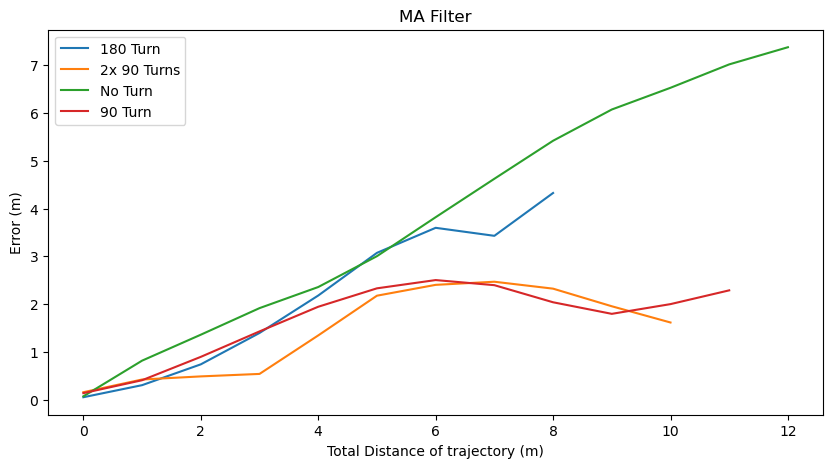

In [33]:
plt.figure(figsize=(10, 5))

for result_file in result_files:
    print(result_file)
    result = pd.read_csv(result_file)

    result.loc[:, "elapsed_time"] = result.timestamp_gt - result.timestamp_gt.values[0]
    result.loc[:, "total_distance"] = result.apply(lambda x: np.linalg.norm(np.asarray(x[1:4])), axis=1)
    
    result.loc[:, "total_distance"] = (result.loc[:, "total_distance"] * 1e3) // 1e3
    
    result = result.loc[:, ["total_distance", "error"]].groupby("total_distance").mean()
    
    distance = result.index.values.astype(np.int16)
    error = result.error.values
    
    plt.plot(distance, error, label=result_file.split("\\")[-1].split(".")[0].split("__")[-1])
    
plt.legend(["180 Turn", "2x 90 Turns", "No Turn", "90 Turn"])
plt.xlabel("Total Distance of trajectory (m)")
plt.ylabel("Error (m)")

plt.title("MA Filter")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int16),
 array([0.29447105, 0.67120252, 1.09039677, 1.64888393, 2.22066983,
        2.65499158, 2.89922294, 2.92761325, 2.84512537, 3.00738269,
        3.4549379 , 3.83345507]))

In [36]:
groundtruth_trajectories = glob.glob("data/trajectories/groundtruth/exp_8/*__trial_2__*.npz")

In [40]:
for groundtruth_trajectory in groundtruth_trajectories:
    pose = np.load(groundtruth_trajectory)["trajectory_t"]
    xyz = pose[:, :3, 3]
    pcd = helpers.make_pcd(xyz)
    pcd.paint_uniform_color([0, 0, 1])
    open3d.visualization.draw_geometries([pcd])
    

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
